# callbacks.one_cycle

In [1]:
%load_ext autoreload
%autoreload 2/

In [2]:
import sys
sys.path.append('..')

## What is One Cycle?

This Callback allows us to easily train a network using Leslie Smith's one cycle policy. To learn more about the 1cycle technique for training neural networks check out [Leslie Smith's paper](https://arxiv.org/pdf/1803.09820.pdf) and for a more graphical and intuitive explanation check out [Sylvain Gugger's post](https://sgugger.github.io/the-1cycle-policy.html).

To use our one cycle policy we will need an [optimum learning rate](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html). We can find this learning rate by using a learning rate finder which can be called by using [`lr_finder`](/train.html#lr_find). [`Lr_finder`](/train.html#lr_find) will try a range of learning rates and plot against the losses. We will pick a value a bit before the minimum, where the loss still improves. Our graph would look something like this:

![onecycle_finder](imgs/onecycle_finder.png)

Here anything between `3x10^-2` and `10^-2` is a good idea.

Next we will apply the one cycle policy with the chosen learning rate as the maximum learning rate. The one cycle policy has three steps:

    1. We progressively increase our learning rate from lr_max/div_factor to lr_max and at the same time we progressively decrease our momentum from mom_max to mom_min.
    2. We do the exact opposite: we progressively decrease our learning rate from lr_max to lr_max/div_factor and at the same time we progressively increase our momentum from mom_min to mom_max.
    3. We further decrease our learning rate from lr_max/div_factor to lr_max/(div_factor x 100) and we keep momentum steady at mom_max.
    
Our learning rate and momentum schedule will have the following form:

![onecycle_params](imgs/onecycle_params.png)

We usually do steps 1 and 2 for an equal amount of iterations that together make ~90% of total iterations. The remaining iterations are used for step 3.

Note: Each of these transitions (i.e. how do we get from one value to another) is described by the annealing function of choice.

## Basic Training

The one cycle policy allows to train very quickly, a phenomenon termed [_superconvergence_](https://arxiv.org/abs/1708.07120). To see this in practice, we will first train a [`ConvLearner`](/) and see how our results compare when we use the [`OneCycleScheduler`](/callbacks.onecyclescheduler.html#OneCycleScheduler)

In [ ]:
from fastai.docs import *
data = image_data_from_folder('../data/cifar10')

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.callbacks.one_cycle import * 

In [ ]:
learn = ConvLearner(data, tvm.resnet18, metrics=accuracy)

In [ ]:
learn.fit(3)

## Training with the 1cycle policy

In [ ]:
learn = ConvLearner(data, tvm.resnet18, metrics=accuracy)

In [ ]:
learn.lr_find()

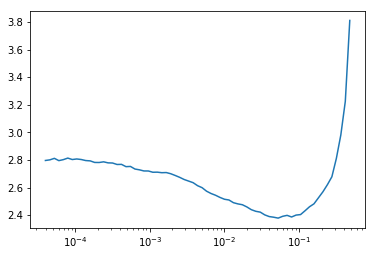

In [ ]:
learn.recorder.plot()

As we can see, with the 1cycle policy our model achieves a considerably lower loss in the same number of epochs.

In [ ]:
cb = OneCycleScheduler(learn, lr_max=0.01)
learn.fit(3, callbacks=cb)

Total time: 12:47
epoch  train loss  valid loss  accuracy
0      1.082182    1.123926    0.605300  (04:15)
1      0.951011    0.873058    0.699100  (04:16)
2      0.769955    0.709449    0.755100  (04:15)



In [ ]:
show_doc(OneCycleScheduler)

## Use by calling .fit_one_cycle() on Learner

As specified in [`basic_train`](/basic_train.html), instead of creating [OneCycleScheduler](/callbacks.one_cycle.html#OneCycleScheduler) manually as above, you can simply call [`Learner.fit_one_cycle`](/train.html#fit_one_cycle).

In [5]:
learn = ConvLearner(data, tvm.resnet18, metrics=accuracy

In [ ]:
cb = OneCycleScheduler(learn, lr_max=0.01)
learn.fit(3, callbacks=cb)

In [3]:
learn.fit_one_cycle(1, 0.01)

NameError: name 'learn' is not defined

## Methods

### Global Variable Definitions:

[`OneCycleScheduler`](/callbacks.one_cycle.html#OneCycleScheduler)

In [ ]:
show_doc(OneCycleScheduler.on_batch_end)

`OneCycleScheduler.on_batch_end`

In [ ]:
show_doc(OneCycleScheduler.on_train_begin)

`OneCycleScheduler.on_train_begin`

In [ ]:
show_doc(OneCycleScheduler.steps)

`OneCycleScheduler.steps`